In [27]:
"""檢視空值及零值"""

import pandas as pd


def analyze_nan_and_zero_values(
    data, threshold, sort_column="零值+NAN佔比 (%)", ascending=False
):
    """
    檢查0值和 nan 的數量
    threshold 為 百分比，例threshold=20，會回傳 零值+NAN佔比 (%) 大於20% 的
    當 threshold = 0 會回傳全部
    """

    # 如果輸入是文件路徑，讀取CSV文件並轉換成Pandas DataFrame

    if isinstance(data, str):

        file_source_pd = pd.read_csv(data)

    # 如果輸入是Pandas DataFrame，直接使用它

    elif isinstance(data, pd.DataFrame):

        file_source_pd = data

    else:

        raise ValueError(
            "Invalid input type. Input must be either file path or Pandas DataFrame."
        )

    # 計算這個範圍內每一欄的空白值(NaN)數量

    nan_values_per_column_in_range = file_source_pd.isnull().sum(axis=0)

    # 計算每個欄位的總數據量

    total_data_per_column = len(file_source_pd)

    # 計算每個欄位的空白值(NaN)佔比

    nan_percentage_per_column = (
        nan_values_per_column_in_range / total_data_per_column
    ) * 100

    # 計算這個範圍內每一欄的零值數量

    zero_values_per_column_in_range = (file_source_pd == 0).sum(axis=0)

    # 計算每個欄位的零值佔比

    zero_percentage_per_column = (
        zero_values_per_column_in_range / total_data_per_column
    ) * 100

    # 計算每個欄位的零值和NaN值的總數

    total_zero_and_nan_per_column = (
        zero_values_per_column_in_range + nan_values_per_column_in_range
    )

    # 計算每個欄位的零值和NaN值總數的佔比

    total_zero_and_nan_percentage_per_column = (
        total_zero_and_nan_per_column / total_data_per_column
    ) * 100

    # 將結果轉換為 DataFrame

    values_df = pd.DataFrame(
        {
            "欄位名稱": nan_values_per_column_in_range.index,
            "零值+NAN佔比 (%)": total_zero_and_nan_percentage_per_column.values.round(
                2
            ),
            "空白值(NaN)數量": nan_values_per_column_in_range.values,
            "空白值(NaN)佔比 (%)": nan_percentage_per_column.values.round(2),
            "零值數量": zero_values_per_column_in_range.values,
            "零值佔比 (%)": zero_percentage_per_column.values.round(2),
        }
    )

    # 將 DataFrame 存儲到 CSV 檔案中
    values_df.to_csv("零值與空白值統計.csv", index=False, encoding="utf-8-sig")

    # 如果 threshold 等於 0，則返回所有欄位
    if threshold == 0:
        return values_df

    # 篩選出 '零值+NAN佔比 (%)' 大於指定閾值的欄位

    filtered_values_df = values_df[values_df["零值+NAN佔比 (%)"] > threshold]

    # 根據指定的列進行排序

    sorted_values_df = filtered_values_df.sort_values(
        by=sort_column, ascending=ascending
    )

    return sorted_values_df


# 測試


# result_df = analyze_nan_and_zero_values(clean_data, threshold=0, sort_column='欄位名稱', ascending=False)


# print(result_df)

In [66]:
import pandas as pd

file_path = r"..\飲料店總表0307final01_補上人氣_補值_hg.xlsx"

# dataset = pd.read_csv(file_path, sep=",", encoding="UTF-8")

dataset = pd.read_excel(file_path)
# print(dataset.info())
# dataset



,name,star,comment,class,address,latitude,longitude,school_counts,drink_counts,train_counts,...,Friday_open_hours,Saturday_open_hours,Sunday_open_hours,weekend_open,road_area_ratio,age,weekday_working_hours_average,people_flow_average,popularity,KMEANS
0,時時飲,3.6,5,冰品飲料店,台北市大安區龍泉街38號,25.024430,121.529341,13,89,0,...,1.0,1.0,1.0,2,0.242220,42.114756,1.0,9.108842,45.544210,1
1,Wjt 爻 Bar,4.9,9,冰品飲料店,台北市松山區敦化北路238巷27號預購取貨點1F,25.060747,121.548234,6,77,0,...,0.0,NaN,NaN,0,0.219356,50.603125,1.0,5.317096,47.853861,4
2,Luv in Crepes 樂芙軟式可麗餅,4.4,442,冰品飲料店,台北市士林區小北街1號,25.090183,121.526910,6,116,0,...,3.0,3.0,3.0,2,0.062639,42.114756,3.0,3.314339,1464.937989,0
3,木木果舖,5.0,4,冰品飲料店,台北市中正區衡陽路53號1樓A室,25.042416,121.512152,11,170,1,...,0.0,NaN,NaN,0,0.234339,42.114756,1.8,14.568913,58.275651,4
4,古早味紅茶青草茶,3.9,8,冰品飲料店,台北市大同區保安街49巷17號,25.060198,121.512097,12,103,0,...,0.0,NaN,NaN,0,0.222440,42.114756,1.6,4.055967,32.447733,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4737,茶鉑樂 茶飲 雞蛋糕,4.6,25,冰品飲料店,台北市大安區和平東路一段71-2號,25.027141,121.524892,12,104,0,...,11.5,NaN,NaN,0,0.242220,42.114756,11.5,9.108842,227.721050,1
4738,了不起茶飲 (台北師大店),4.7,51,冰品飲料店,台北市大安區和平東路一段71之2號,25.027096,121.524922,12,104,0,...,11.5,NaN,NaN,0,0.242220,42.114756,11.5,9.108842,464.550942,1
4739,初牧,2.5,4,珍珠奶茶,台北市內湖區,25.072204,121.593762,8,18,0,...,10.0,NaN,NaN,0,0.111398,41.417793,10.0,2.828382,11.313530,1
4740,燒杯咖啡藝廚 Beaker ChefCafe,4.2,296,冰品飲料店,台北市萬華區西園路一段240號,25.034773,121.498825,11,96,1,...,7.0,NaN,NaN,0,0.197613,44.497559,7.0,1.120147,331.563444,1


In [34]:
X = dataset[["comment","people_flow_average","popularity"]]

In [37]:
analyze_nan_and_zero_values(
    X, 0, sort_column="零值+NAN佔比 (%)", ascending=False
)

,欄位名稱,零值+NAN佔比 (%),空白值(NaN)數量,空白值(NaN)佔比 (%),零值數量,零值佔比 (%)
0,comment,0.0,0,0.0,0,0.0
1,people_flow_average,0.0,0,0.0,0,0.0
2,popularity,0.0,0,0.0,0,0.0


In [39]:
'''因為數值分布差很多 刪掉極端'''
# 直接在原始 DataFrame 中刪除 'popularity' 小於 8726.779 的行
X = X[X['popularity'] <= 2213.641425]
X = X[X['comment'] != 0]

# 計算符合條件的資料筆數
count_of_records = len(dataset)
print("原本資料筆數為:", count_of_records)
# 計算符合條件的資料筆數
count_of_records = len(X)
print("符合條件的資料筆數為:", count_of_records)


# 顯示過濾後的數據
# print(selected_data)

原本資料筆數為: 4742
符合條件的資料筆數為: 4211


In [41]:
X = X[["comment","people_flow_average"]]


,comment,people_flow_average
0,5,9.108842
1,9,5.317096
2,442,3.314339
3,4,14.568913
4,8,4.055967
...,...,...
4737,25,9.108842
4738,51,9.108842
4739,4,2.828382
4740,296,1.120147


## 資料前處理

數值編碼（Label Encoding）
這種方法會根據不同的類別分配不同的號碼。例如，對於 name、class、address、district 和 neighborhood 這些特徵，我們將使用 Label Encoding 將每個唯一的類別值轉換為一個唯一的整數。

name 根據不同店名給號碼
class 根據不同類別給號碼
address 根據不同地址給號碼
district 根據不同區給號碼
neighborhood 根據不里給號碼

brand nan 值太多放棄

In [2]:
import pandas as pd

# 假設您已經有了您的原始數據框 X
# X = dataset

# 先將特定的列轉換為類別型
X["name"] = X["name"].astype("category")
X["class"] = X["class"].astype("category")
X["address"] = X["address"].astype("category")
X["district"] = X["district"].astype("category")
X["neighborhood"] = X["neighborhood"].astype("category")
X["brand"] = X["brand"].astype("category")

# 使用類別型的 codes 進行編碼
X["name"] = X["name"].cat.codes
X["class"] = X["class"].cat.codes
X["address"] = X["address"].cat.codes
X["district"] = X["district"].cat.codes
X["neighborhood"] = X["neighborhood"].cat.codes
X["brand"] = X["brand"].cat.codes

# 處理nan，確定這些值符合你的數據特性和需求
X["brand"] = X["brand"].fillna(-1)  # 假設未知品牌填充為-1
X["Saturday_open_hours"] = X["Saturday_open_hours"].fillna(
    -1
)  # 假設未知開放時間填充為-1
X["Sunday_open_hours"] = X["Sunday_open_hours"].fillna(-1)  # 假設未知開放時間填充為-1

# 如果您想查看轉換後的數據
# print(X.head())

# 熱力圖

In [ ]:
# 計算相關矩陣
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = X.corr()

# 繪製熱力圖
plt.figure(figsize=(28, 24))
sns.heatmap(corrmat, annot=True, annot_kws={"size": 12})
plt.show()

In [ ]:
# 計算相關矩陣
import seaborn as sns
import matplotlib.pyplot as plt

indexes_to_drop = [
    "Monday_open_hours",
    "Tuesday_open_hours",
    "wendesday_open_hours",
    "Thursday_open_hours",
    "Friday_open_hours",
    "Saturday_open_hours",
    "Sunday_open_hours",
    "star",
    "class",
    "latitude",
    "longitude",
    "train_counts",
    "night_market_counts",
    "neighborhood",
    "people_flow_mean",
    "knock_down_price_mean",
    "brand",
    "weekday_working_hours_average",
    "name",
]
corrmat = X.drop(columns=indexes_to_drop).corr()  # 修改此處為columns，以刪除行

# 繪製熱力圖
plt.figure(figsize=(28, 24))
sns.heatmap(corrmat, annot=True, annot_kws={"size": 12})
plt.show()

In [40]:
X.columns

Index(['comment', 'people_flow_average', 'popularity'], dtype='object')

特徵哈希（Feature Hashing）
這是另一種處理類別型特徵的方法，尤其適用於特徵類別非常多的情況。這種方法將類別型特徵轉換為固定大小的數值向量。這可以減少維度並減少記憶體的使用，但它可能會引入哈希碰撞。

In [ ]:
# analyze_nan_and_zero_values(X, 60, ascending=False)

In [42]:
import matplotlib.pyplot as plt

# 解決字體問題
plt.rcParams["font.family"] = ["Microsoft YaHei"]
plt.rcParams["axes.unicode_minus"] = False

# 肘部方法 (Elbow Method)

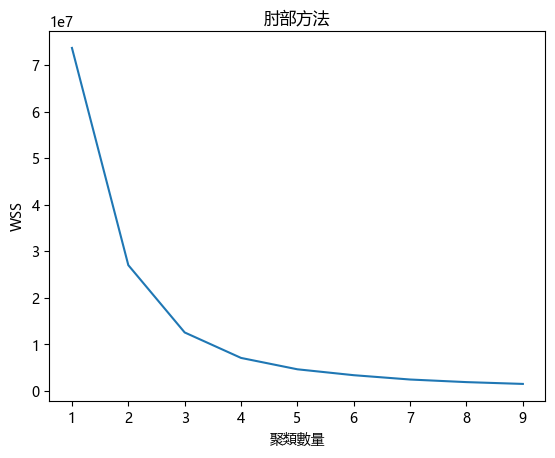

In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 10):  # 試驗不同的聚類數量，從 1 到 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)  # 使用經過獨熱編碼的數據
    wcss.append(kmeans.inertia_)

# 繪製肘部曲線
plt.plot(range(1, 10), wcss)
plt.title("肘部方法")
plt.xlabel("聚類數量")
plt.ylabel("WSS")  # WSS 是總內平方和
plt.show()

# 輪廓係數 (Silhouette Score)

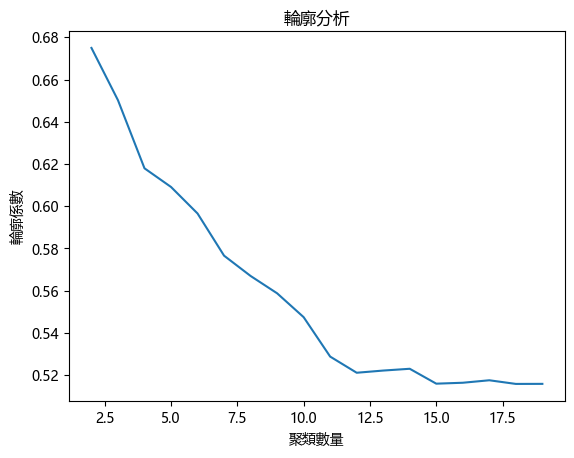

In [45]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 20):  # 聚類數量至少為 2
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

# 繪製輪廓係數
plt.plot(range(2, 20), silhouette_scores)
plt.title("輪廓分析")
plt.xlabel("聚類數量")
plt.ylabel("輪廓係數")
plt.show()

# 戴維斯-布爾丁指數 (Davies-Bouldin Index)

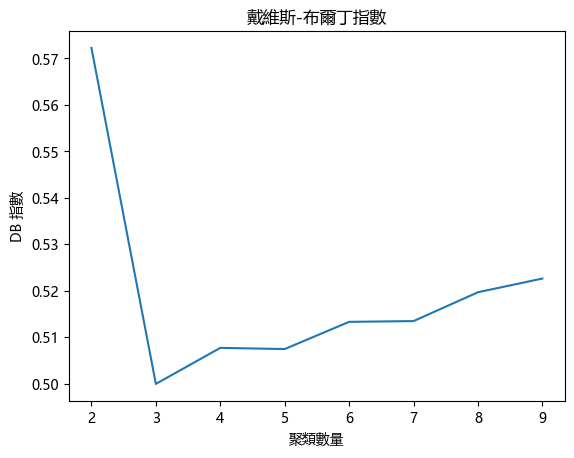

In [48]:
from sklearn.metrics import davies_bouldin_score


db_scores = []

for i in range(2, 10):  # 聚類數量至少為 2

    kmeans = KMeans(n_clusters=i, random_state=42)

    cluster_labels = kmeans.fit_predict(X)

    db_scores.append(davies_bouldin_score(X, cluster_labels))


# 繪製戴維斯-布爾丁分數

plt.plot(range(2, 10), db_scores)
plt.title("戴維斯-布爾丁指數")

plt.xlabel("聚類數量")

plt.ylabel("DB 指數")

plt.show()

### K-means

In [ ]:
print(type(X))
X_base = X
X

最終累計解釋方差比例: 0.76


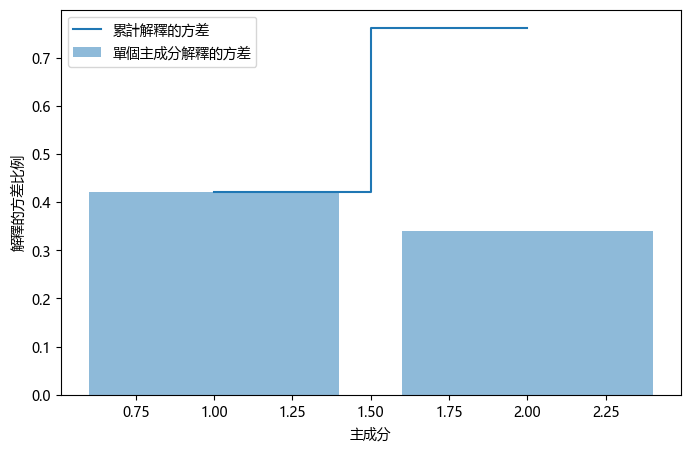

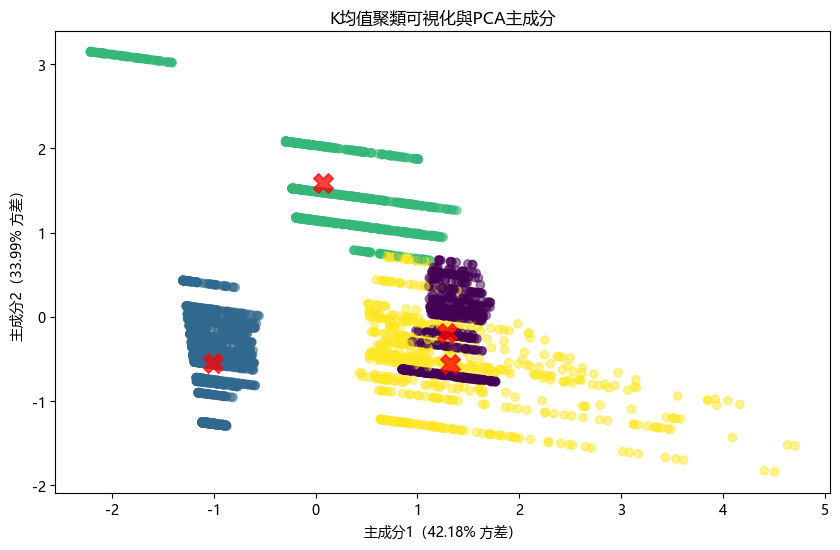

In [65]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# 標準化數據
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)

# 執行 KMeans 分類
n_clusters = 4  # 根據你的圖像，我們使用4個群組
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_scaled)
labels = kmeans.labels_

# 將分群結果新增到數據框中
X["Cluster"] = labels

# 使用 PCA 進行降維以方便可視化
pca = PCA(n_components=2)
components = pca.fit_transform(df_scaled)

# 1. 解釋的變異量（Explained Variance Ratio）
explained_var_ratio = pca.explained_variance_ratio_
# print("主成分的解釋方差比例:", explained_var_ratio)

# 2. 累積解釋的變異量（Cumulative Explained Variance）
cumulative_var_ratio = np.cumsum(explained_var_ratio)
# print("累計解釋方差比例:", cumulative_var_ratio)
print(f"最終累計解釋方差比例: {cumulative_var_ratio[-1]:.2f}")

# 3. Scree Plot
# 繪製Scree Plot
plt.figure(figsize=(8, 5))
plt.bar(
    range(1, len(explained_var_ratio) + 1),
    explained_var_ratio,
    alpha=0.5,
    align="center",
    label="單個主成分解釋的方差",
)
plt.step(
    range(1, len(cumulative_var_ratio) + 1),
    cumulative_var_ratio,
    where="mid",
    label="累計解釋的方差",
)

# 顯示最終的累計解釋方差比例
final_cumulative_variance = cumulative_var_ratio[-1]

# plt.text(len(cumulative_var_ratio), final_cumulative_variance, f'最終累計解釋方差比例: {final_cumulative_variance:.2f}', va='bottom', ha='right')

plt.ylabel("解釋的方差比例")
plt.xlabel("主成分")
plt.legend()
# plt.text(len(cumulative_var_ratio), final_cumulative_variance, f'最終累計解釋方差比例: {final_cumulative_variance:.2f}', va='bottom', ha='right')
plt.show()


# 4. 主成分的載荷（即特徵貢獻）
loadings = pca.components_

num_features = loadings.shape[1]  # 使用載荷矩陣的特徵數量
# feature_names = X.drop('Cluster', axis=1).columns
feature_names = X.columns

loadings_df = pd.DataFrame(
    loadings, columns=X.columns, index=[f"PC{i+1}" for i in range(loadings.shape[0])]
)

# print("每個主成分的載荷（即特徵權重）:")
# print(loadings_df)


# 可视化分群结果和 PCA 主成分
plt.figure(figsize=(10, 6))
plt.scatter(components[:, 0], components[:, 1], c=labels, cmap="viridis", alpha=0.5)
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(
    centers[:, 0], centers[:, 1], c="red", s=200, alpha=0.75, marker="X"
)  # 群組的中心點
plt.title("K均值聚類可視化與PCA主成分")
plt.xlabel(f"主成分1（{explained_var_ratio[0]*100:.2f}% 方差）")
plt.ylabel(f"主成分2（{explained_var_ratio[1]*100:.2f}% 方差）")
plt.show()

In [ ]:
"""分類結果再存一個"""

from sklearn.cluster import KMeans

# 假設 X 是您的特徵矩陣
kmeans = KMeans(n_clusters)  # 這裡的4應該與您想要的聚類數相匹配
kmeans.fit(X)  # 對數據進行聚類
labels = kmeans.labels_  # 獲取每個點的聚類標籤

# 現在，您可以將 labels 添加到您的數據集中
# 假設 df 是您的原始數據框(DataFrame)
X["KMEANS"] = labels

In [ ]:
import pandas as pd

# 將數據框轉換為Excel文件
output_filename = "飲料店總表0307final01_補上人氣_補值_xlsxclustered_HG_data.xlsx"  # 設定檔案路徑和名稱
X.to_excel(output_filename, index=False)  # 將數據框寫入Excel文件，不包含行索引

print(f"分群結果已儲存至 {output_filename}")  # 打印檔案儲存位置

畫 輪廓分析 圖

對於聚類數量 = 5 平均輪廓分數 = 0.10485099967612756


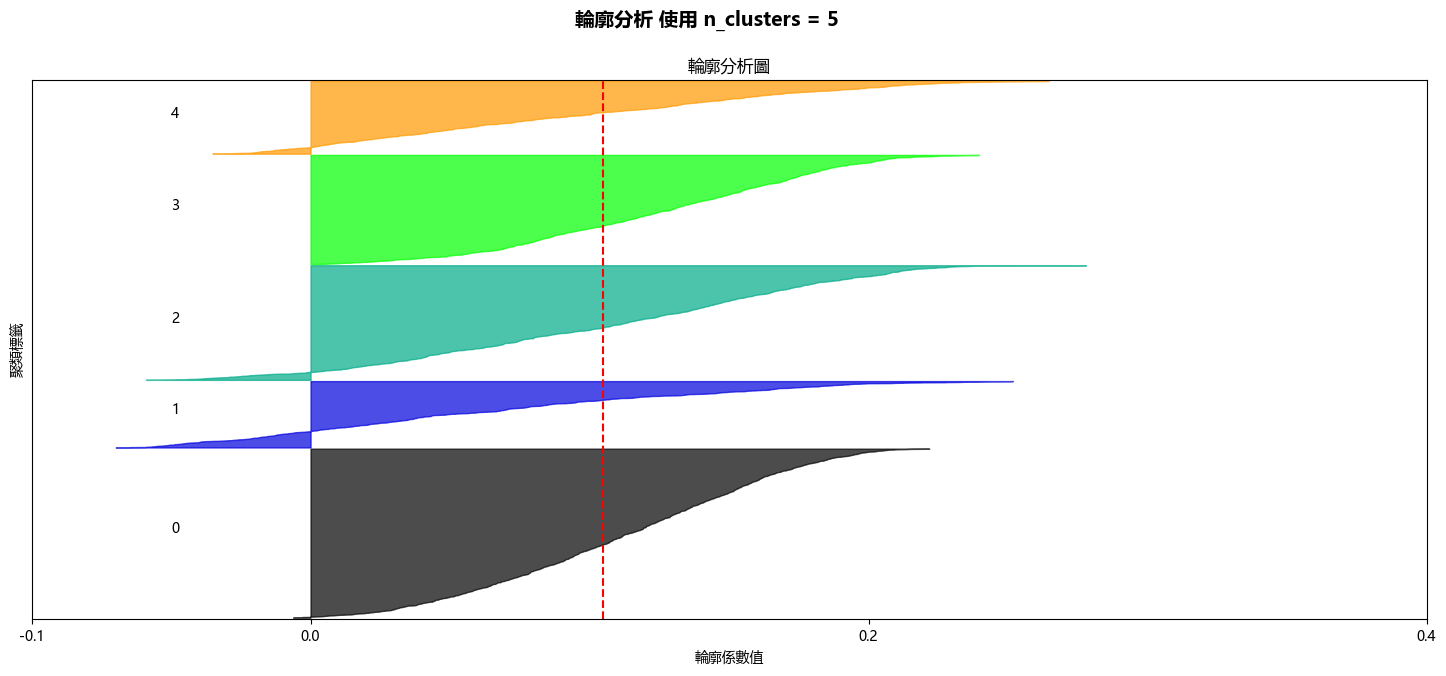

In [10]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# 標準化數據
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)

# n_clusters 是你的聚類數量
range_n_clusters = [5]  # 這裡可以放入不同的聚類數量進行測試，例如 [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # 創建一個 subplot
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # 輪廓係數的範圍是[-1, 1]，但這裡只顯示從-0.1到1的範圍
    ax1.set_xlim([-0.1, 0.4])
    # (n_clusters+1)*10 是為了在每個聚類之間插入一個空白的空間
    ax1.set_ylim([0, len(df_scaled) + (n_clusters + 1) * 10])

    # 初始化 KMeans
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_scaled)

    # 計算所有樣本的平均輪廓分數
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("對於聚類數量 =", n_clusters, "平均輪廓分數 =", silhouette_avg)

    # 計算所有樣本的輪廓分數
    sample_silhouette_values = silhouette_samples(df_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # 聚集第i個聚類的輪廓分數並進行排序
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # 標記聚類在中間的位置
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # 計算下一個聚類的y下限
        y_lower = y_upper + 10  # 10 是每個聚類的間隔

    ax1.set_title("輪廓分析圖")
    ax1.set_xlabel("輪廓係數值")
    ax1.set_ylabel("聚類標籤")

    # 畫出平均輪廓分數的垂直線
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # 清除y軸的刻度
    ax1.set_xticks([-0.1, 0, 0.2, 0.4])

    plt.suptitle(
        ("輪廓分析 " "使用 n_clusters = %d" % n_clusters),
        fontsize=14,
        fontweight="bold",
    )
plt.show()

In [ ]:
"""抽調一個看看，效果不是很好"""

import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 創建存儲結果的文件夾
output_folder = "PCA_KMeans_Results"
os.makedirs(output_folder, exist_ok=True)

# 創建一個空的DataFrame來存儲每次迭代的結果
results_df = pd.DataFrame(
    columns=["Feature Omitted", "Final Cumulative Explained Variance"]
)

# 假定 X 是一個 DataFrame
original_X = X.copy()  # 創建一份 X 的副本，以保持原始數據不變
original_feature_names = X.columns.tolist()  # 保存原始特徵名稱

# 通過省略每個特徵進行迭代
for i, feature_to_omit in enumerate(original_feature_names):
    print(f"\n正在省略特徵: {feature_to_omit}")

    # 從原始數據創建一個不包含當前省略特徵的新數據框
    X_temp = original_X.drop(feature_to_omit, axis=1)

    # 標準化數據
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(X_temp)

    # 執行 KMeans 分類
    n_clusters = 3
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_scaled)
    labels = kmeans.labels_

    # 使用 PCA 進行降維以方便可視化
    pca = PCA(
        n_components=min(df_scaled.shape[1], 9)
    )  # 確保 n_components 不會超過特徵數
    components = pca.fit_transform(df_scaled)

    # 解釋的變異量（Explained Variance Ratio）
    explained_var_ratio = pca.explained_variance_ratio_

    # 累積解釋的變異量（Cumulative Explained Variance）
    cumulative_var_ratio = np.cumsum(explained_var_ratio)
    final_cumulative_variance = cumulative_var_ratio[-1]
    print(f"最終累計解釋方差比例: {final_cumulative_variance:.2f}")

    # 添加結果到DataFrame
    new_row = pd.DataFrame(
        {
            "Feature Omitted": [feature_to_omit],
            "Final Cumulative Explained Variance": [final_cumulative_variance],
        }
    )
    results_df = pd.concat([results_df, new_row], ignore_index=True)

    # 繪製Scree Plot
    plt.figure(figsize=(8, 5))
    plt.bar(
        range(1, len(explained_var_ratio) + 1),
        explained_var_ratio,
        alpha=0.5,
        align="center",
        label="單個主成分解釋的方差",
    )
    plt.step(
        range(1, len(cumulative_var_ratio) + 1),
        cumulative_var_ratio,
        where="mid",
        label="累計解釋的方差",
    )
    plt.ylabel("解釋的方差比例")
    plt.xlabel("主成分")
    plt.legend()
    plt.savefig(f"{output_folder}/ScreePlot_{feature_to_omit}.png")  # 保存圖表
    plt.close()  # 關閉圖表

    # 可视化分群结果和 PCA 主成分
    plt.figure(figsize=(10, 6))
    plt.scatter(components[:, 0], components[:, 1], c=labels, cmap="viridis", alpha=0.5)
    centers = pca.transform(kmeans.cluster_centers_)
    plt.scatter(centers[:, 0], centers[:, 1], c="red", s=200, alpha=0.75, marker="X")
    plt.title("K均值聚類可視化與PCA主成分")
    plt.xlabel(f"主成分1（{explained_var_ratio[0]*100:.2f}% 方差）")
    plt.ylabel(f"主成分2（{explained_var_ratio[1]*100:.2f}% 方差）")
    plt.savefig(f"{output_folder}/Clusters_{feature_to_omit}.png")  # 保存圖表
    plt.close()  # 關閉圖表

# 將結果保存到Excel文件
results_df.to_excel(f"{output_folder}/PCA_KMeans_Results.xlsx", index=False)